# Entropy based discretization

In [1]:
%matplotlib inline  

import pandas as pd
import numpy as np
import random
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from funciones import *

import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
x = pd.read_csv('./../datasets/endirehEdad.csv', usecols=["P1_3"])
y = pd.read_csv('./../datasets/endireh.csv', usecols=["P9_8"])

In [8]:
x.shape, y.shape

((21551, 1), (20186, 1))

In [10]:
#x.describe(percentiles=[.20, .80, .95])
x.describe()

,P1_3
count,21551.000000
mean,6.362396
std,8.452070
min,1.000000
25%,3.000000
50%,5.000000
75%,7.000000
max,99.000000


### Graficarlos

/home/arivas/.local/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:2064: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:250: FutureWarning: Support for m

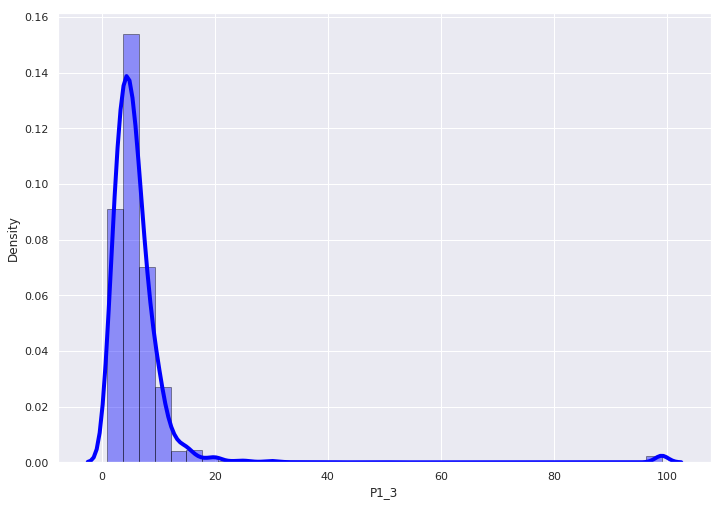

In [11]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.distplot(x['P1_3'], hist=True, kde=True, 
             bins=35, color = 'blue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})


En la distribución también luce bien. Tomando en cuenta que la edad tiene rango de 15 a 49 años (35 en total) al tener 4 rangos deberían tener un total de 8.75 años si se hiciera por cortes equitativos. La diferencia entre los propuestos no es muy alejada a lo que se emcniona, así que tomaré esta clasificación como buena.

## Pasar la clasificación por edad

In [34]:
x["class"] = -1

In [35]:
x.loc[x[x["EDAD"]<=a].index, "class"] = 0
x.loc[x[(x["EDAD"]>a) & (x["EDAD"]<=b)].index, "class"] = 1
x.loc[x[(x["EDAD"]>b) & (x["EDAD"]<=c)].index, "class"] = 2
x.loc[x[x["EDAD"]>c].index, "class"] = 3

In [36]:
x["class"].value_counts()/x["class"].value_counts().sum()

2    0.317015
1    0.275161
0    0.238272
3    0.169551
Name: class, dtype: float64

### Para cada 5 anios

de 15 a 19, de 20 a 24, ...,45 a 49

In [49]:
x.loc[x[x["EDAD"]<=a].index, "class2"] = 0

In [56]:
for i in range(7):
    actual = i*5 + 15
    print(i, actual, actual+5)
    x.loc[x[(x["EDAD"]>=actual) & (x["EDAD"]<actual+5)].index, "class2"] = i

0 15 20
1 20 25
2 25 30
3 30 35
4 35 40
5 40 45
6 45 50


In [57]:
x

,EDAD,class2
0,30,3.0
1,39,4.0
2,23,1.0
3,23,1.0
4,38,4.0
...,...,...
21546,37,4.0
21547,28,2.0
21548,17,0.0
21549,25,2.0
